<a href="https://colab.research.google.com/github/VenkataraoGaddam/CourseWork/blob/main/GTSRB_BigData_ML_Models_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras import layers, models, applications
from keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.applications import ResNet50

import os

from google.colab import drive # Import the drive library

# Mount Google Drive
drive.mount('/content/drive') # Mount to access files
# Define the path to the GTSRB dataset
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Train'
#dataset_path = '/content/GTSRB/Train'

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.17.1
3.5.0
Mounted at /content/drive
Num GPUs Available:  1


In [ ]:
data = []
labels = []
classes = 43

for i in range(classes):
  path = os. path.join(dataset_path, str(i))
  images = os.listdir(path)
  for a in images:
    try:
        image = Image.open(path + '/' + a) # Changed '\' to '/' for path separator
        image = image.resize((32,32))
        image = np.array(image)
        data.append(image)
        labels.append(i)
    except Exception as e: # Added Exception handling and print error message
        print(f"Error loading image: {a}, Error: {e}")
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)
# Preprocessing data - Normilizing and resize
data = data / 255.0
#labels = labels / 255.0

#Splitting training and testing dataset
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)

#Converting labels into one hot encoding
num_classes = len(np.unique(y_t1))
y_t1 = to_categorical(y_t1, num_classes)
y_t2 = to_categorical(y_t2, num_classes)
print(num_classes)

(39209, 32, 32, 3) (39209,)
(31367, 32, 32, 3) (7842, 32, 32, 3) (31367,) (7842,)
43


In [ ]:
# Data Augmentation Layer Integration into Training Process

# Data Augmentation with adding random flips and rotations
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

# Apply data augmentation to the training dataset only
augmented_images = []
for image in X_t1:
  augmented_images.append(data_augmentation(image, training=True))


In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Flatten the images
X_train_flat = X_t1.reshape(X_t1.shape[0], -1)
X_test_flat = X_t2.reshape(X_t2.shape[0], -1)

#Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_flat, np.argmax(y_t1, axis=1))

# Predict
y_pred_rf = rf_model.predict(X_test_flat)

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_t2, axis=1), y_pred_rf)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.9790869676103034


In [ ]:
# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model = knn_model.fit(X_train_flat, np.argmax(y_t1, axis=1))

#Predict
y_pred_knn = knn_model.predict(X_test_flat)

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_t2, axis=1), y_pred_knn)
print(f"KNN Accuracy: {accuracy}")

KNN Accuracy: 0.8723539913287427


In [1]:
# Transfer Learning with MobileNetV2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model

# Resize images for MobileNetV2
X_train_resized = np.array([tf.image.resize(image, (96, 96)) for image in X_t1])
X_test_resized = np.array([tf.image.resize(image, (96, 96)) for image in X_t2])

# Load Pre-trained MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

mobilenet_model = Model(inputs=base_model.input, outputs=output)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

NameError: name 'np' is not defined

Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 102s 93ms/step - accuracy: 0.4912 - loss: 2.0291 - val_accuracy: 0.1306 - val_loss: 3.3021
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.9080 - loss: 0.3429 - val_accuracy: 0.8462 - val_loss: 0.5192
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.9204 - loss: 0.3582 - val_accuracy: 0.9225 - val_loss: 0.2725
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.9552 - loss: 0.1929 - val_accuracy: 0.9156 - val_loss: 0.3133
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.9700 - loss: 0.1308 - val_accuracy: 0.9024 - val_loss: 0.4290
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9584 - loss: 0.1796 - val_accuracy: 0.9612 - val_loss: 0.1405
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.9707 - loss: 0.1246 - val_accuracy: 0.9744 - val_loss: 0.0926
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.9773 - loss: 0.0925 -

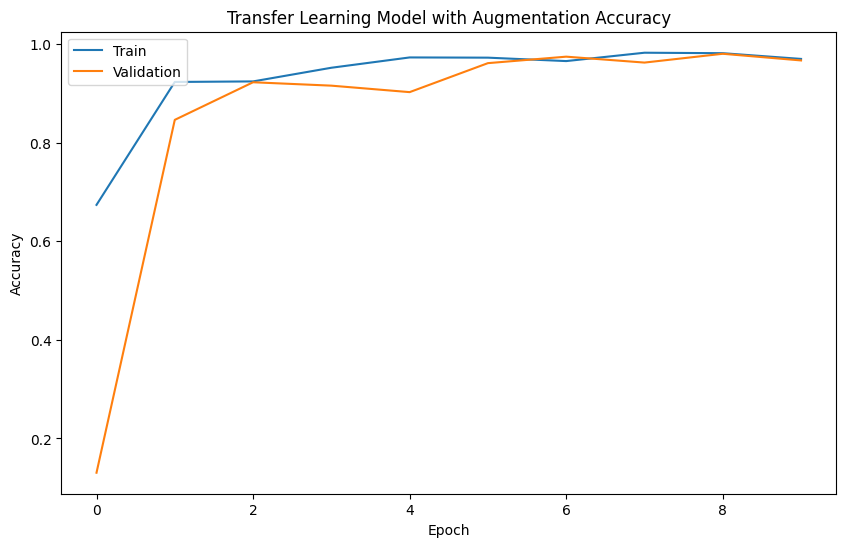

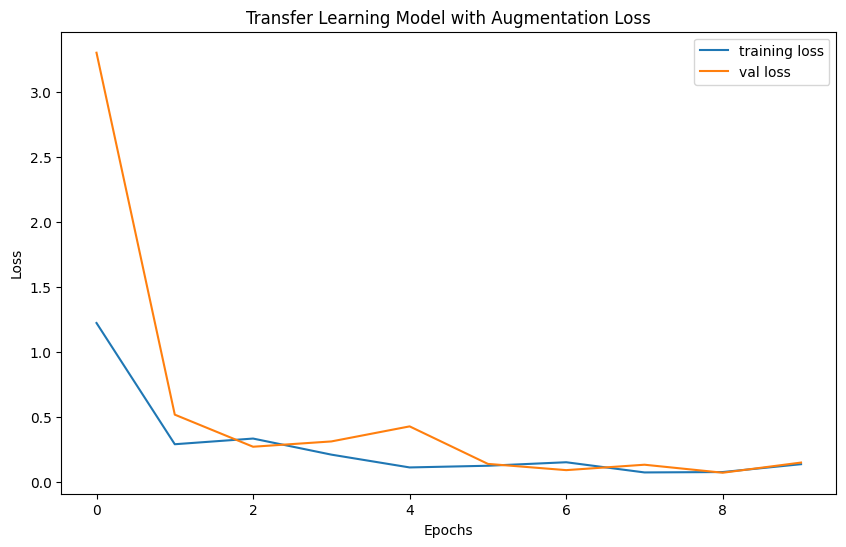

In [ ]:
# Train the model
history = mobilenet_model.fit(X_train_resized, y_t1, batch_size=32, epochs=10, validation_data=(X_test_resized, y_t2))
# predict
pred_mobilenet =  mobilenet_model.predict(X_t2)
y_pred_mobilenet = np.argmax(pred_mobilenet, axis=-1)

# Plot training & validation accuracy values for transfer learning
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Transfer Learning Model with Augmentation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Transfer Learning Model with Augmentation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
mobilenet_model.save('Transfer_Learning.keras')

In [ ]:

#Building the CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_t1.shape[1:]))
cnn_model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(rate=0.25))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(rate=0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(rate=0.25))
cnn_model.add(Dense(num_classes, activation='softmax')) #Compilation of the model
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.summary()
# Plot the model
plot_model(cnn_model, show_shapes=True, show_dtype=True)
cnn_model.save('Building_CNN.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 43)                  │          11,051 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,939 (1.36 MB)

 Trainable params: 356,939 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model Training and Validation
history = cnn_model.fit(X_t1, y_t1, batch_size=64, epochs=10, validation_data=(X_t2, y_t2))

# predict
pred_cnn = cnn_model.predict(X_t2)
y_pred_cnn = np.argmax(pred_cnn, axis=-1)

cnn_model.save('CNN_Model.keras')

Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.3623 - loss: 2.3728 - val_accuracy: 0.9542 - val_loss: 0.2036
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9257 - loss: 0.2432 - val_accuracy: 0.9814 - val_loss: 0.0689
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9639 - loss: 0.1183 - val_accuracy: 0.9898 - val_loss: 0.0396
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9737 - loss: 0.0856 - val_accuracy: 0.9922 - val_loss: 0.0311
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9794 - loss: 0.0637 - val_accuracy: 0.9903 - val_loss: 0.0358
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9810 - loss: 0.0633 - val_accuracy: 0.9949 - val_loss: 0.0204
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9860 - loss: 0.0433 - val_accuracy: 0.9948 - val_loss: 0.0216
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9867 - loss: 0.0427 - val_accuracy: 

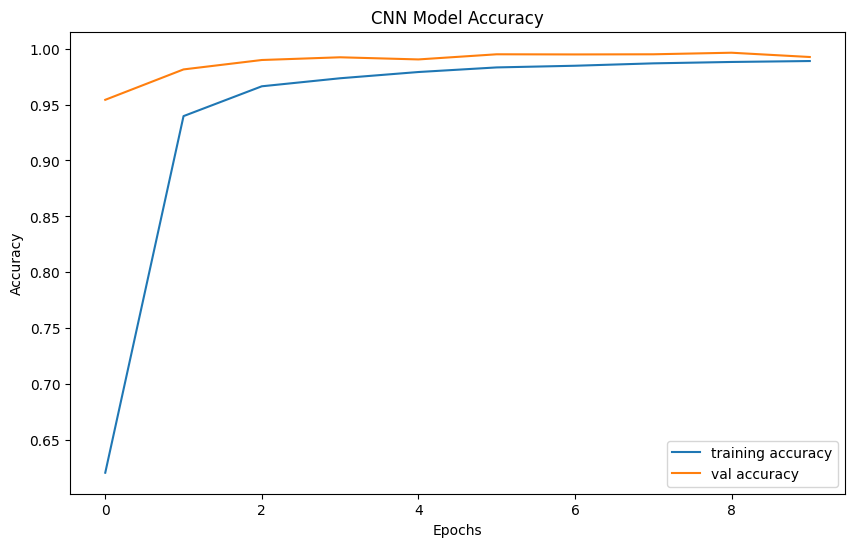

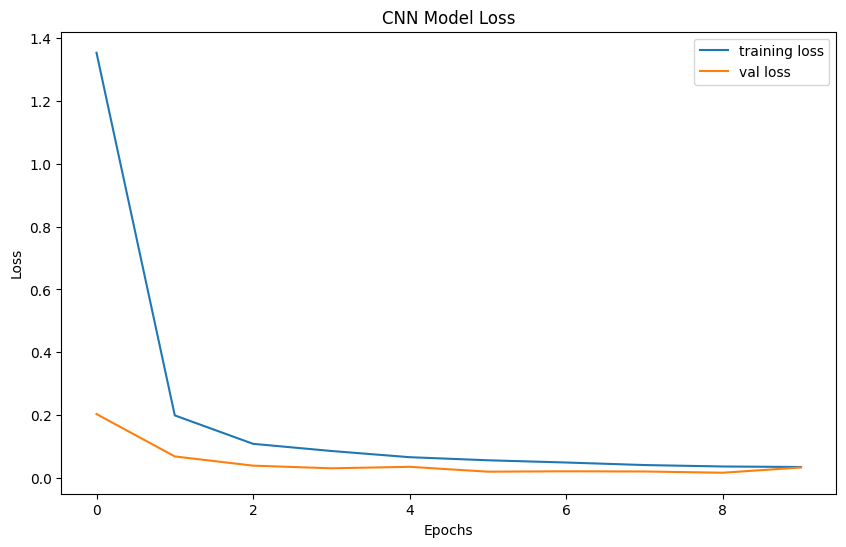

In [ ]:
#plotting graphs for accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluation Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

def evaluate_model(model_name, y_pred, y_test):
    y_test_labels = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(y_test_labels, y_pred)
    precision = precision_score(y_test_labels, y_pred, average='macro')
    recall = recall_score(y_test_labels, y_pred, average='macro')
    f1 = f1_score(y_test_labels, y_pred, average='macro')
    classification_rep = classification_report(y_test_labels, y_pred)
    confmatrix = confusion_matrix(y_test_labels, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")
    print(classification_rep)

    f,ax = plt.subplots(figsize=(30, 20))
    sns.heatmap(confmatrix, annot=True, linewidths=0.01, cmap="BuPu", linecolor="gray", fmt=".1f", ax=ax);
    plt.xlabel("Predicted Label");
    plt.ylabel("True Label");
    plt.title("Confusion Matrix");
    plt.show();

Evaluation Metrics:
Random Forest - Accuracy: 0.98, Precision: 0.99, Recall: 0.98, F1 Score: 0.98
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        38
           1       0.94      0.96      0.95       496
           2       0.94      0.96      0.95       450
           3       0.98      0.93      0.95       280
           4       0.97      0.98      0.97       418
           5       0.95      0.96      0.95       364
           6       1.00      1.00      1.00        59
           7       0.96      0.94      0.95       278
           8       0.98      0.97      0.97       301
           9       1.00      0.98      0.99       268
          10       0.99      1.00      0.99       370
          11       0.98      0.99      0.99       236
          12       1.00      1.00      1.00       450
          13       0.98      1.00      0.99       452
          14       0.99      1.00      1.00       162
          15       1.00      0.95    

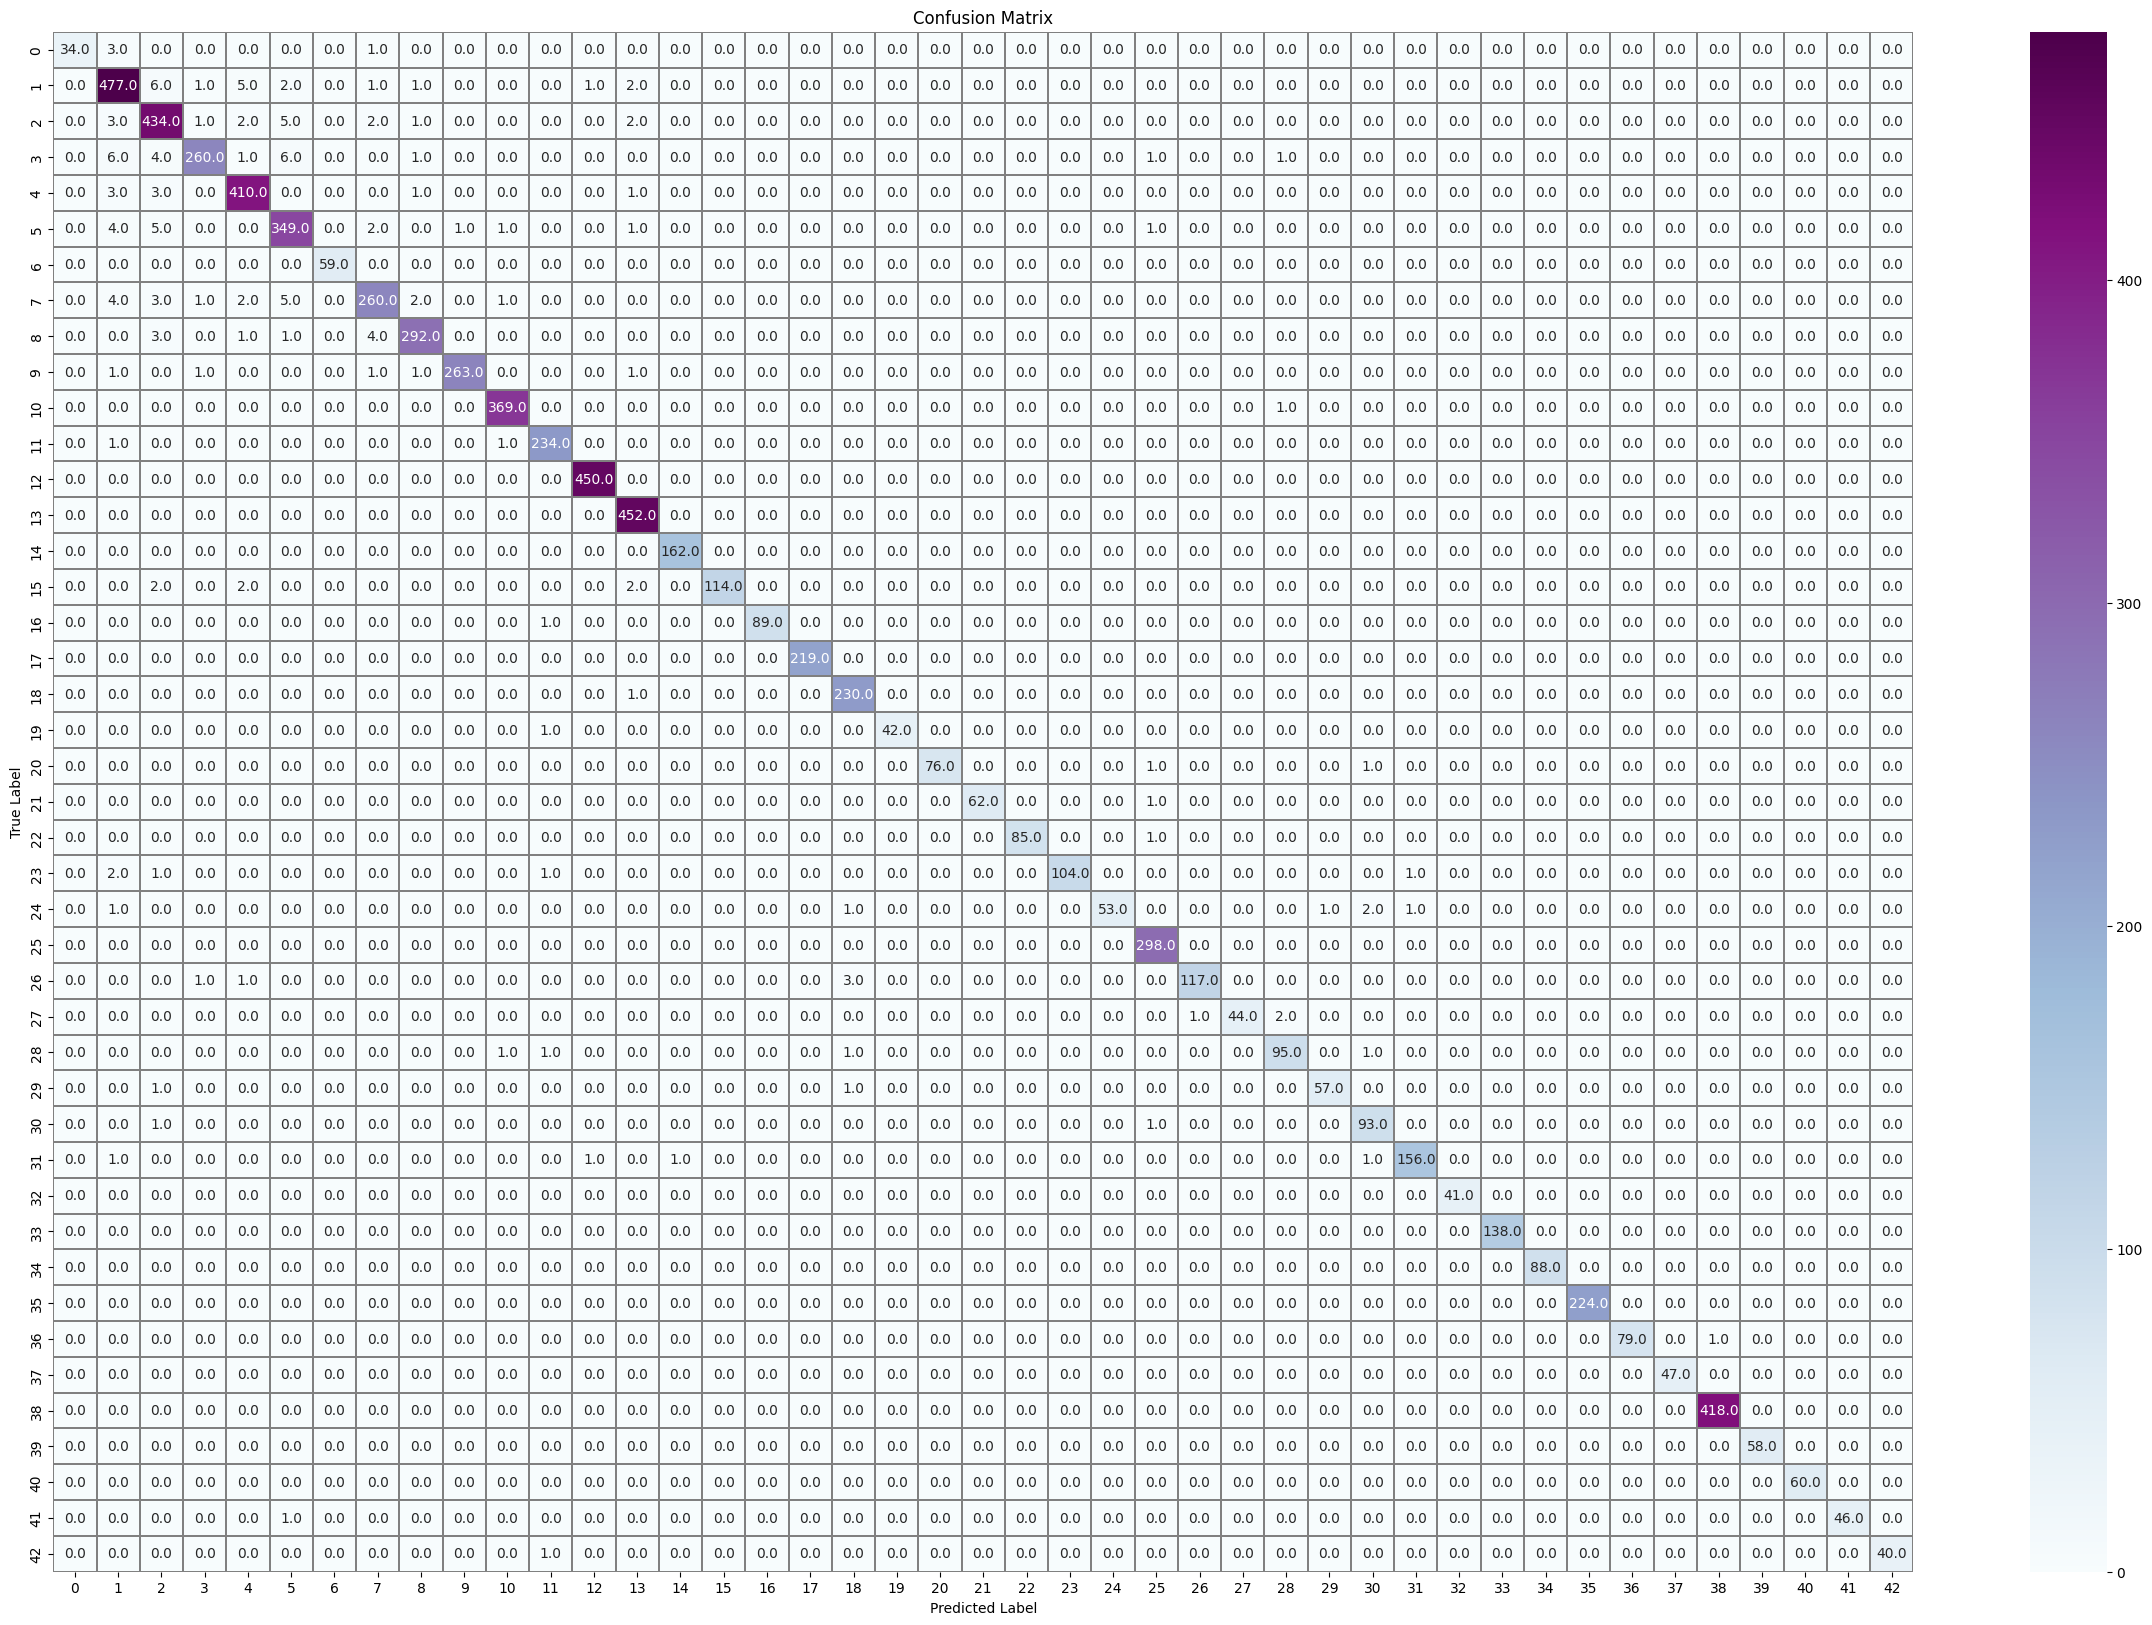

K-Nearest Neighbors - Accuracy: 0.87, Precision: 0.89, Recall: 0.87, F1 Score: 0.88
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        38
           1       0.86      0.89      0.87       496
           2       0.85      0.87      0.86       450
           3       0.78      0.79      0.78       280
           4       0.82      0.88      0.85       418
           5       0.68      0.85      0.76       364
           6       0.89      0.97      0.93        59
           7       0.76      0.87      0.81       278
           8       0.82      0.92      0.87       301
           9       0.93      0.82      0.87       268
          10       0.89      0.88      0.88       370
          11       0.90      0.87      0.88       236
          12       0.95      0.89      0.92       450
          13       0.95      0.91      0.93       452
          14       1.00      0.84      0.91       162
          15       0.92      0.85      0.88       1

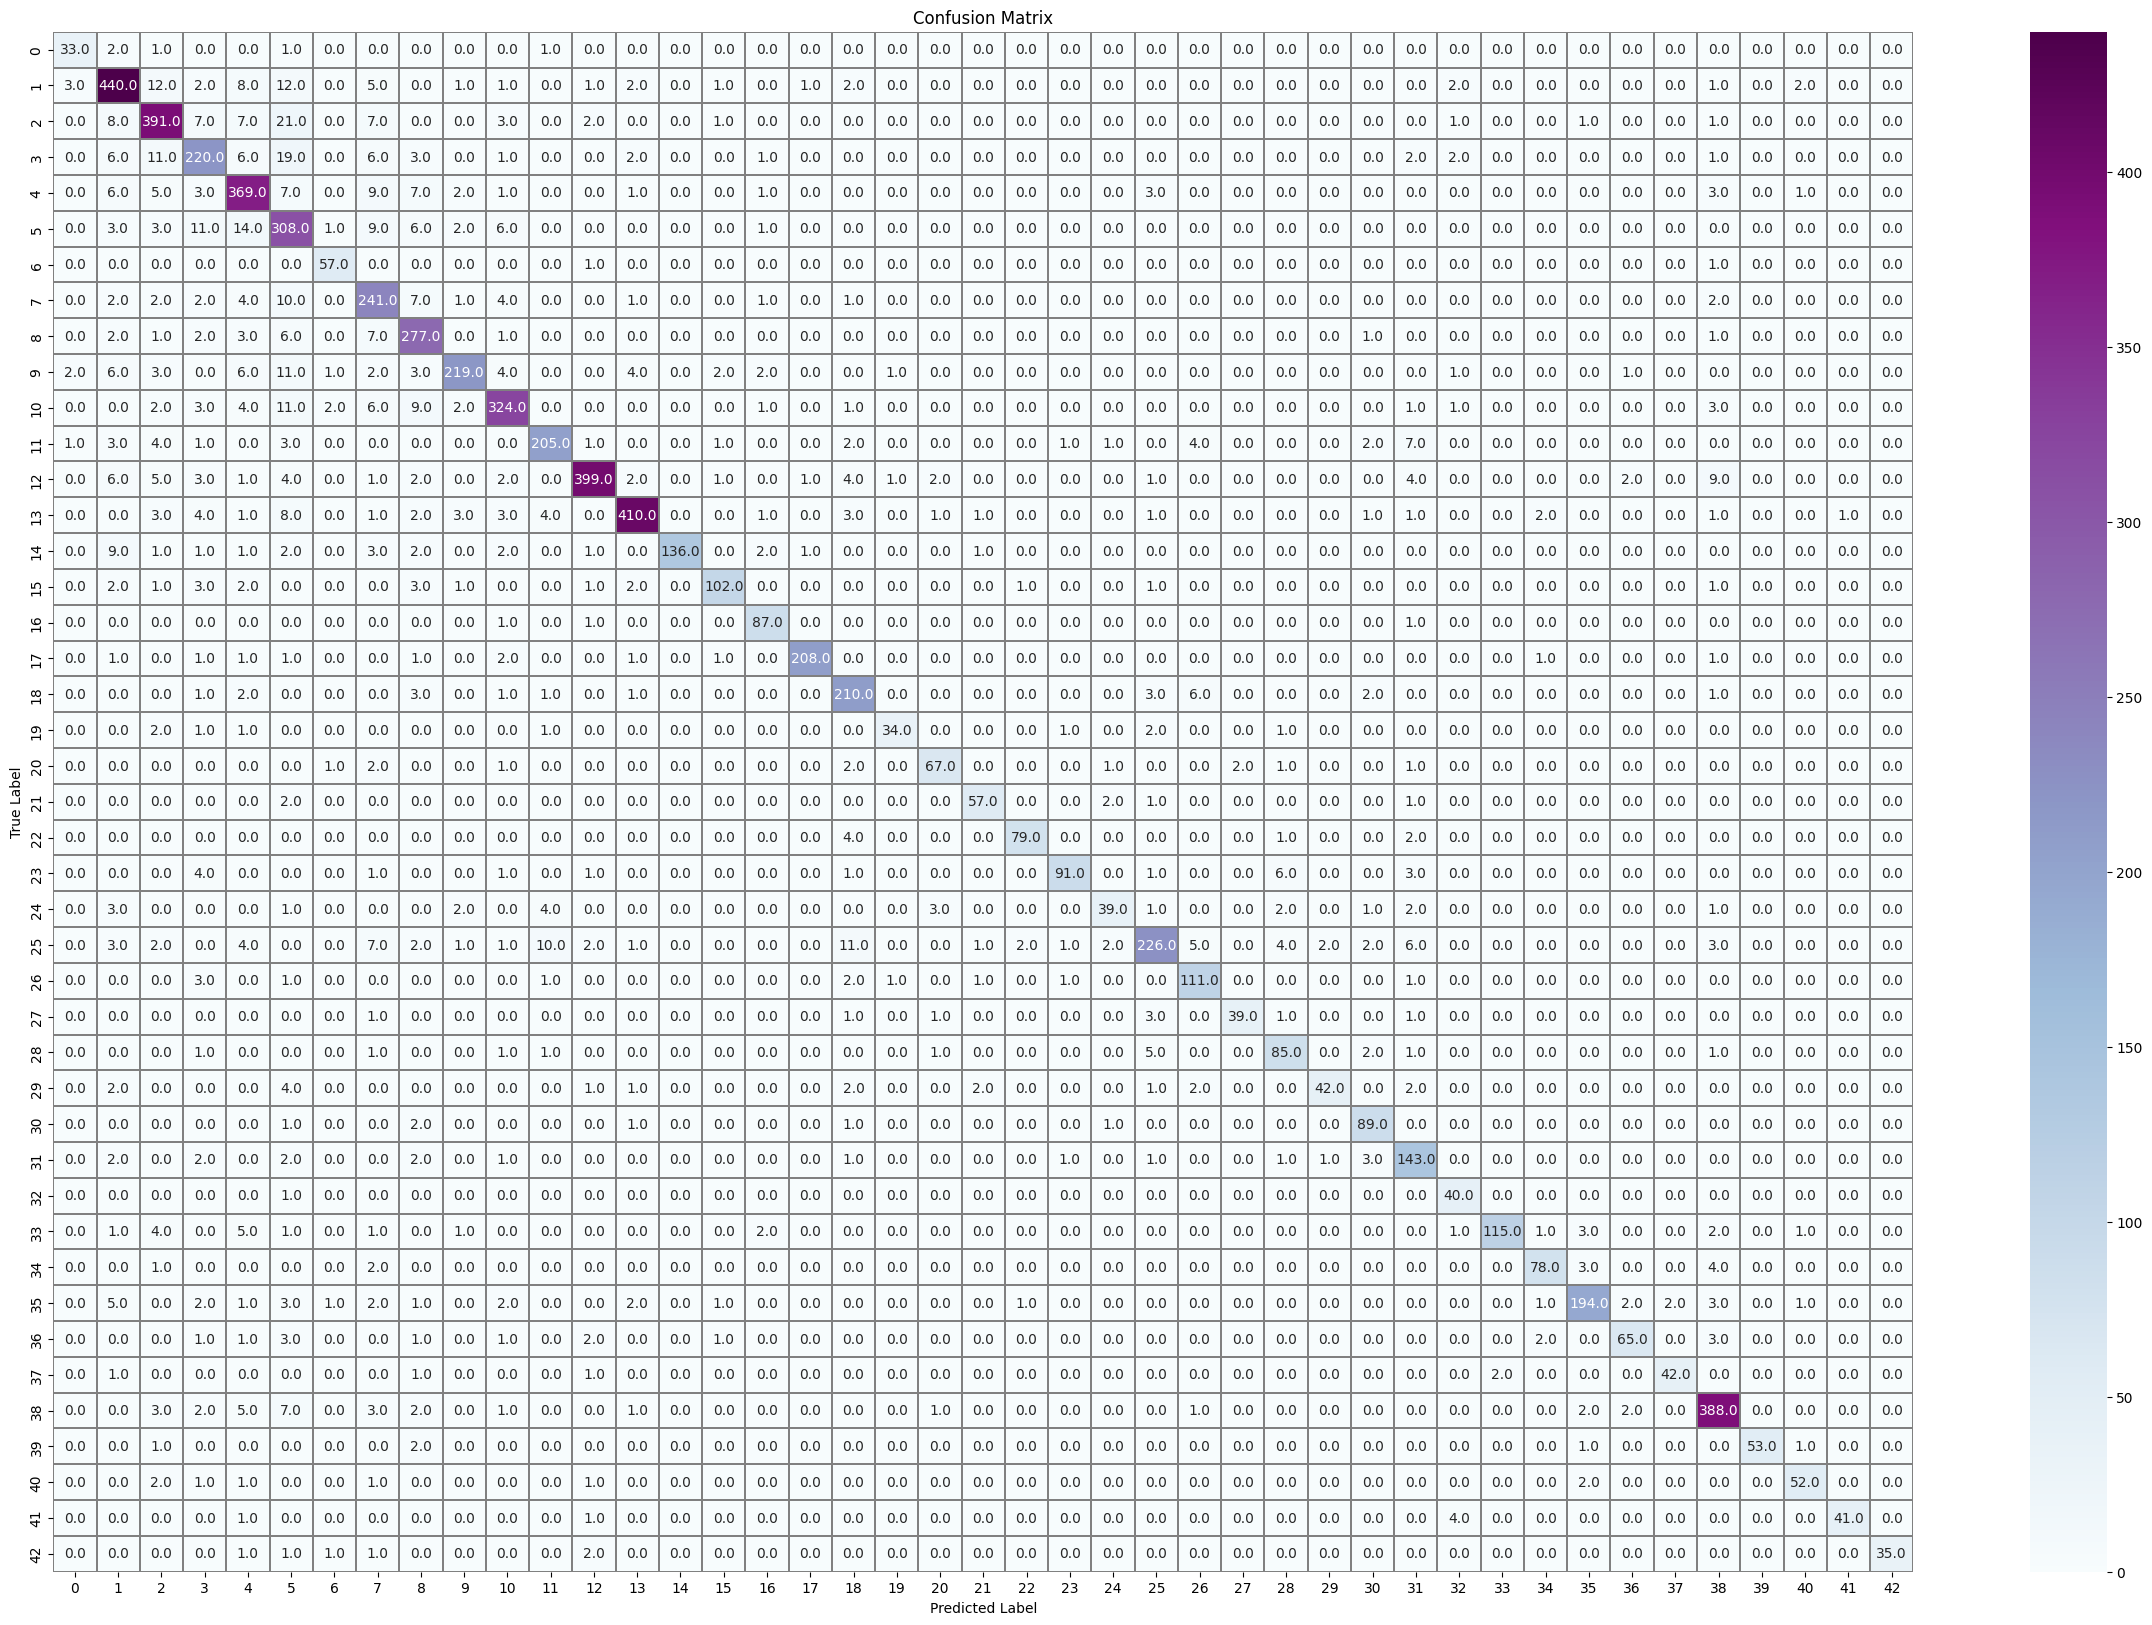

CNN - Accuracy: 0.99, Precision: 0.99, Recall: 0.99, F1 Score: 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.99      0.97      0.98       496
           2       0.99      0.98      0.99       450
           3       0.99      0.99      0.99       280
           4       1.00      0.98      0.99       418
           5       0.95      0.99      0.97       364
           6       1.00      1.00      1.00        59
           7       0.99      1.00      1.00       278
           8       0.99      0.99      0.99       301
           9       0.99      1.00      0.99       268
          10       0.99      1.00      0.99       370
          11       1.00      1.00      1.00       236
          12       1.00      1.00      1.00       450
          13       1.00      1.00      1.00       452
          14       1.00      0.99      0.99       162
          15       1.00      0.97      0.98       120
          16 

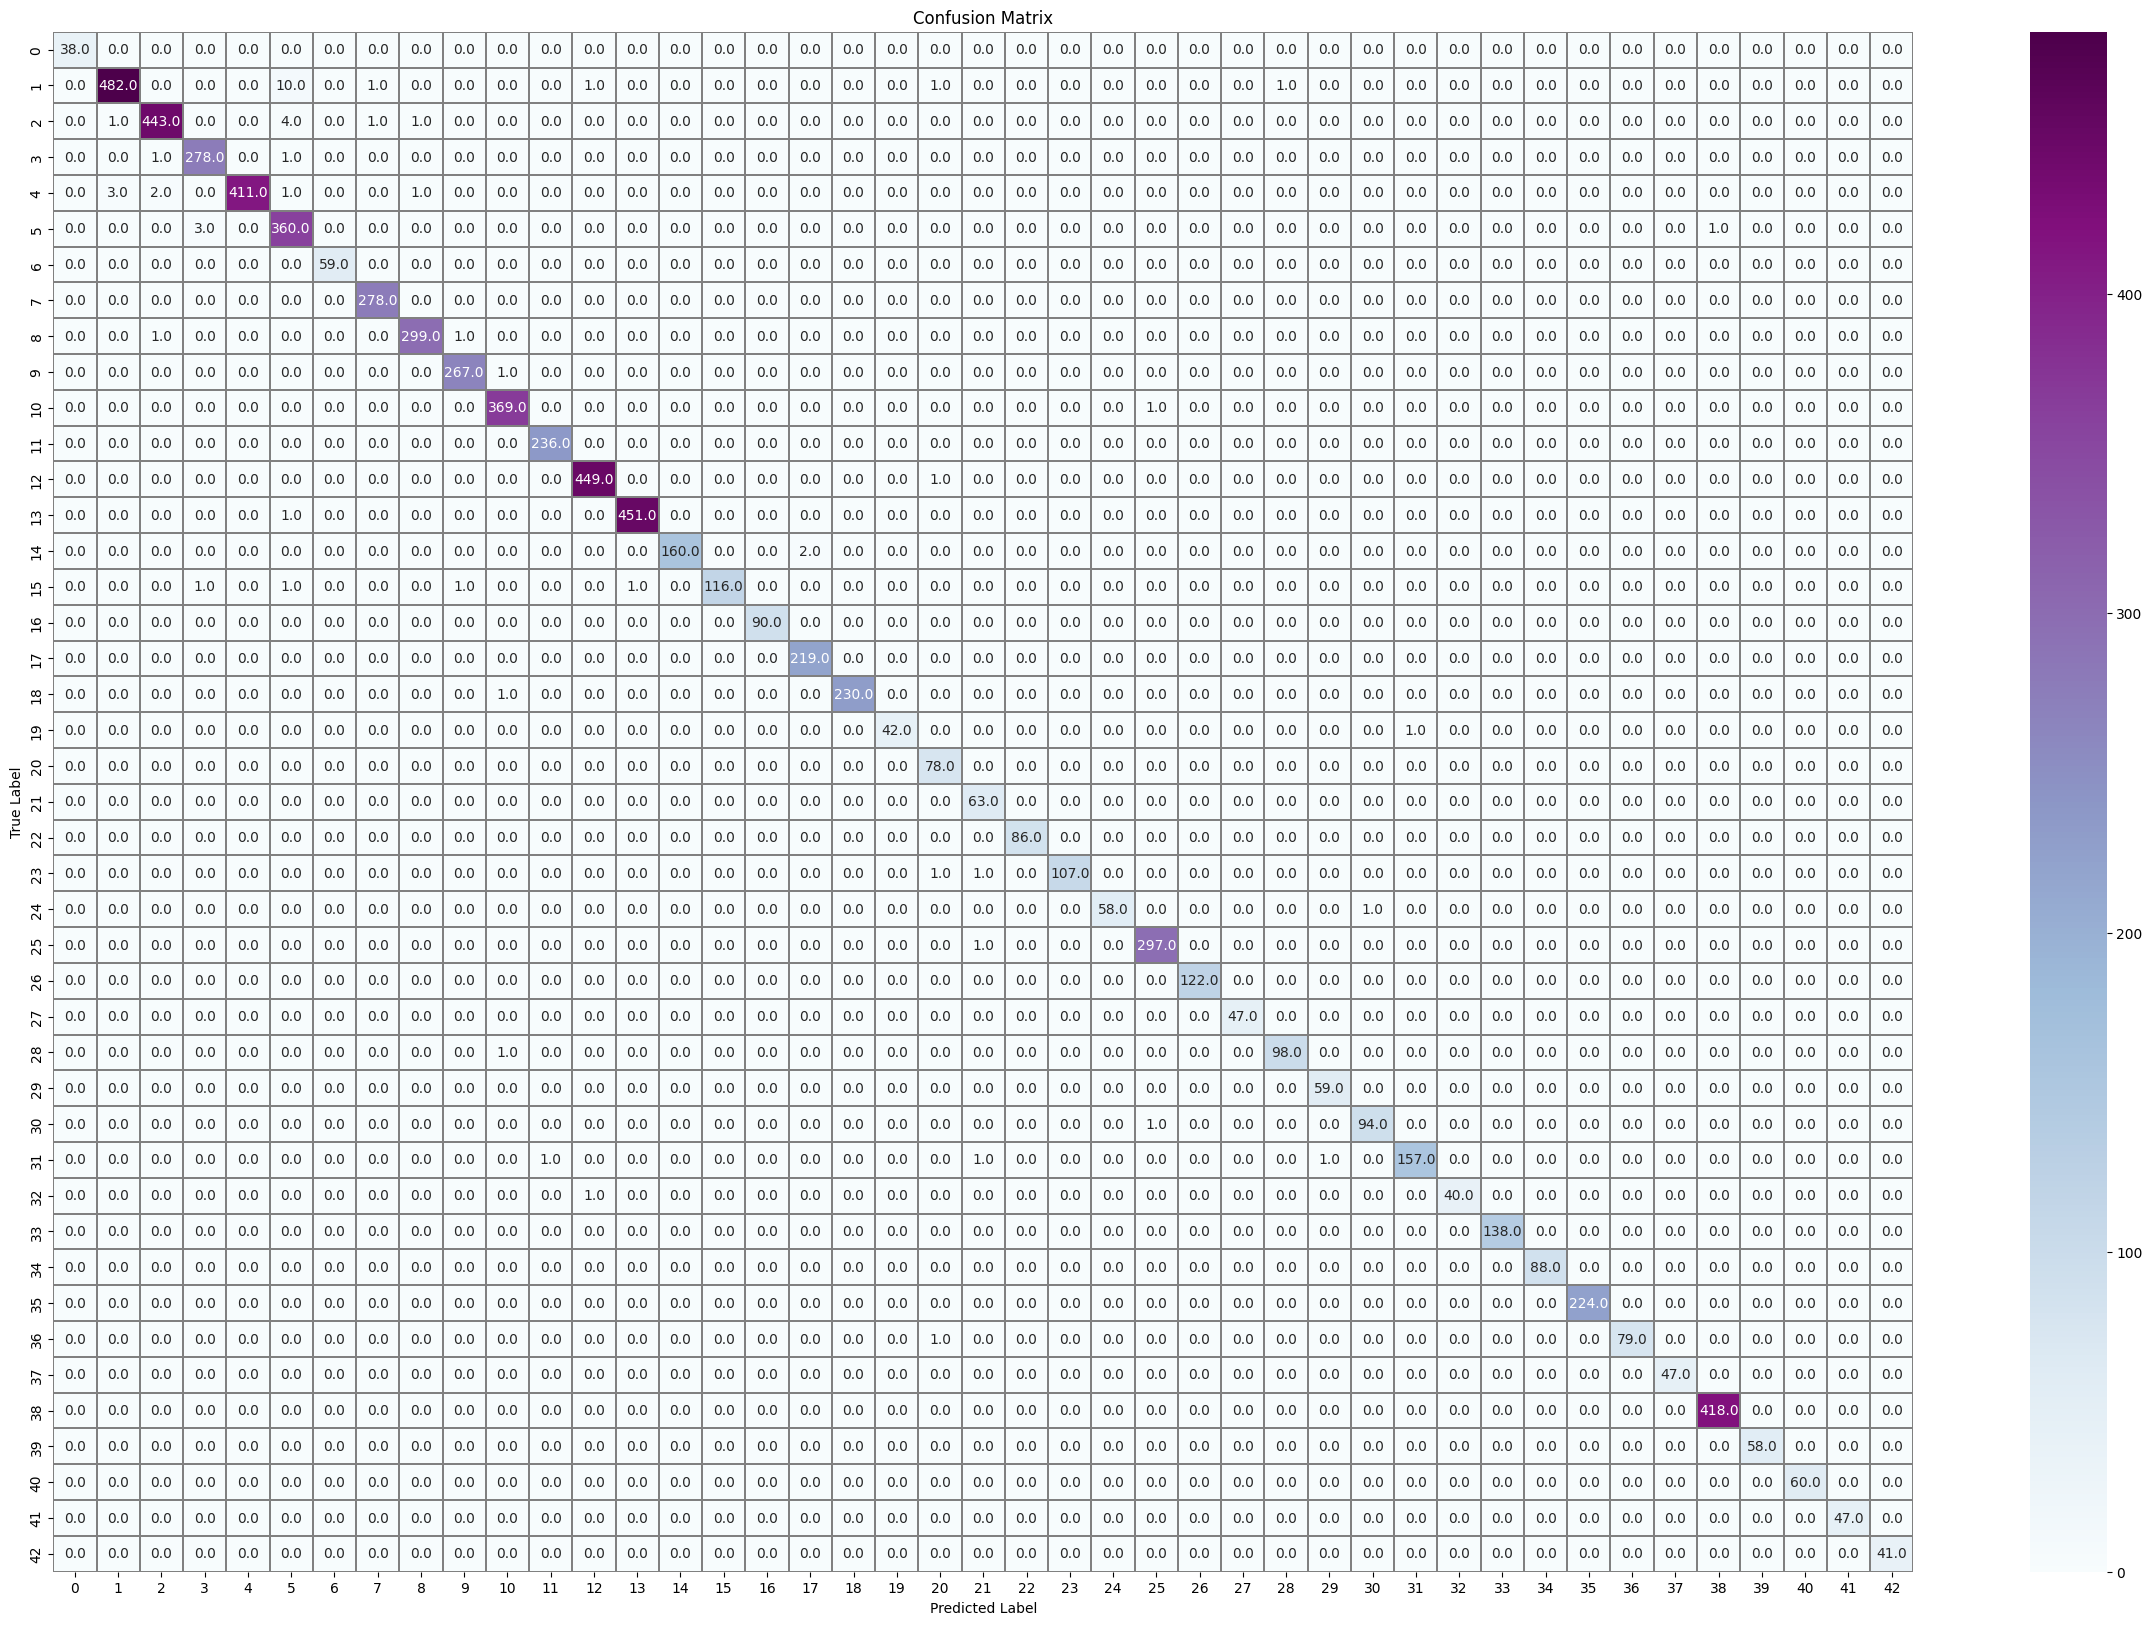

Transfer Learning - Accuracy: 0.97, Precision: 0.97, Recall: 0.96, F1 Score: 0.96
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.93      0.98      0.95       496
           2       0.96      0.98      0.97       450
           3       0.99      0.97      0.98       280
           4       0.98      0.93      0.95       418
           5       0.85      0.98      0.91       364
           6       1.00      1.00      1.00        59
           7       0.98      0.96      0.97       278
           8       1.00      0.80      0.89       301
           9       1.00      0.99      0.99       268
          10       0.99      0.98      0.98       370
          11       0.99      0.97      0.98       236
          12       0.99      1.00      1.00       450
          13       1.00      1.00      1.00       452
          14       0.95      0.99      0.97       162
          15       1.00      0.88      0.93       120

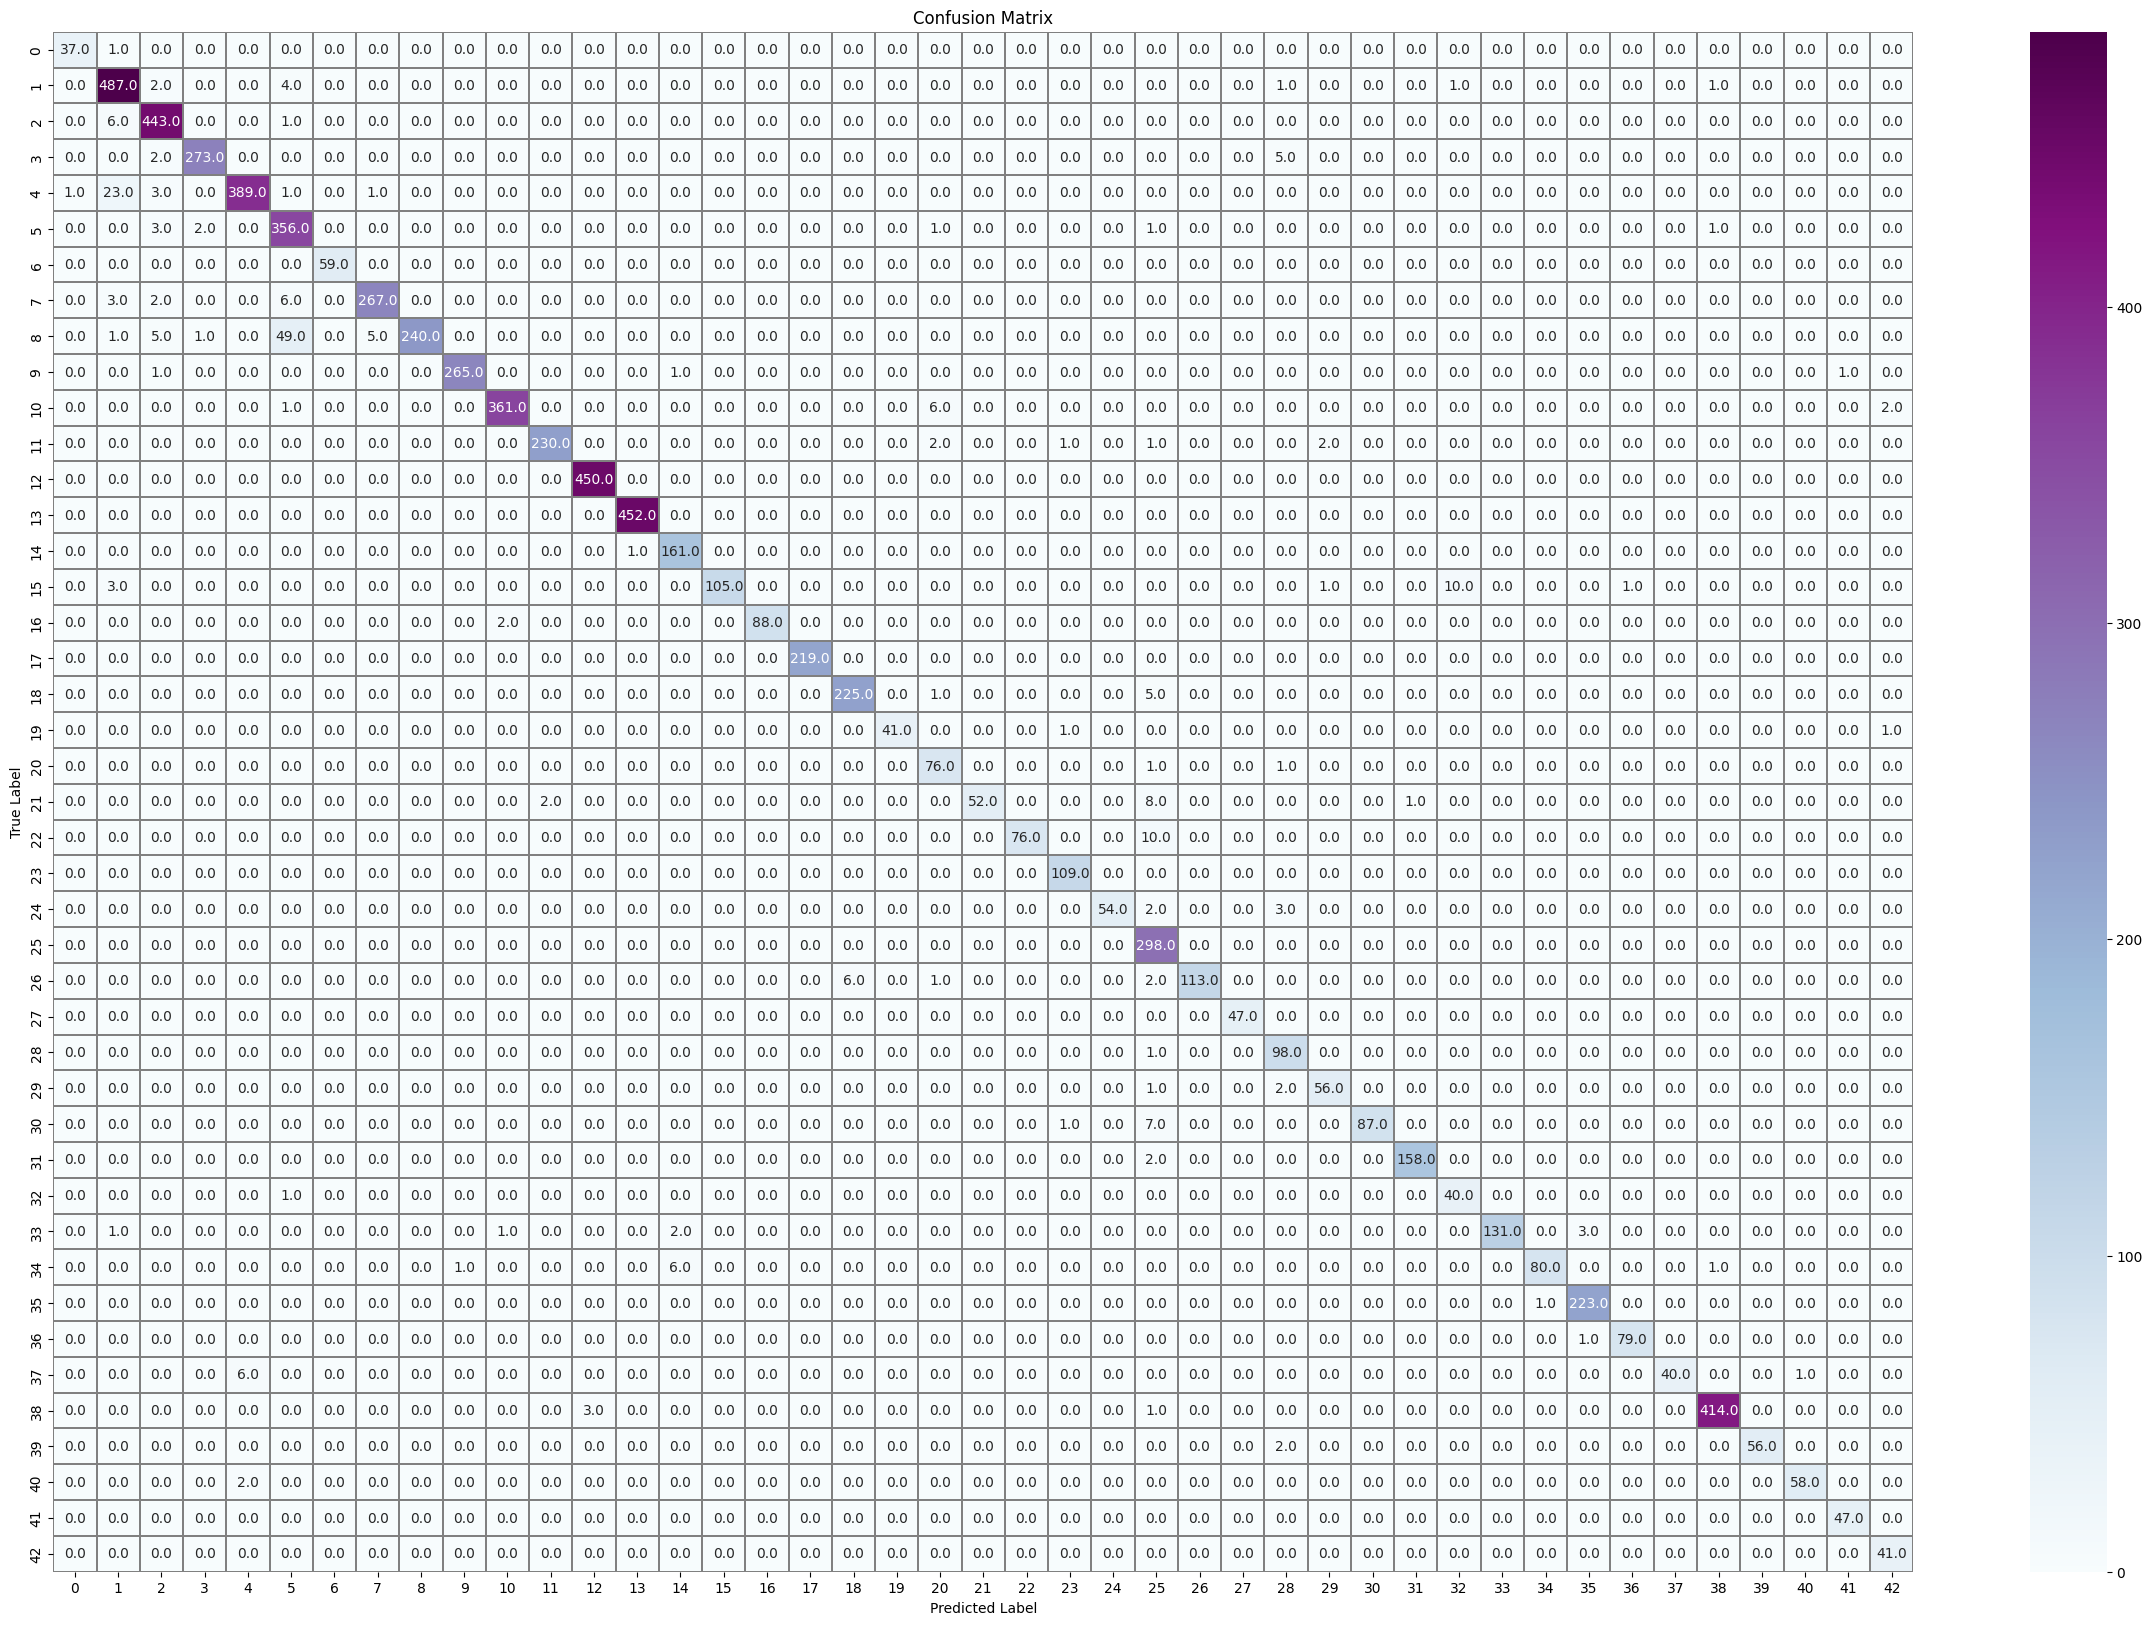

In [ ]:
# Evaulating the models
print("Evaluation Metrics:")
# Evaluate the RF model
evaluate_model("Random Forest", y_pred_rf, y_t2)
# Evaluate the KNN model
evaluate_model("K-Nearest Neighbors", y_pred_knn, y_t2)
# Evaluate the CNN model
evaluate_model("CNN", y_pred_cnn, y_t2)
# Evaluate the TL model
evaluate_model("Transfer Learning", y_pred_mobilenet, y_t2)
tf.saved_model.save(cnn_model, 'ML_Models')